# Audio classification to detect Anti-social behaviour

This is an audio classification problem where there is a set of audio files that are organized into 10 different folders. The details of these audio files are stored in a CSV file, which  includes metadata such as the file name, file path, duration, sample rate, etc.

The goal of the classification problem is to build a machine learning model that can accurately classify these audio files based on their content or characteristics.The model is mainly used to detect different sounds relating to crime and antisocial behaviour.

To build a successful model for this problem,  will need to preprocess the audio files to extract relevant features or representations, such as spectral features, mel-frequency cepstral coefficients (MFCCs), or time-frequency representations. We may also need to address issues such as class imbalance, noisy or low-quality data, or variations in the length or format of the audio files.

Overall, this is a challenging and important problem in audio signal processing and machine learning, with applications in areas such as music and speech recognition, audio surveillance, and environmental monitoring.

## Data preprocessing

### Import the required packages

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm import tqdm
import os
import librosa
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

In [4]:
#testing a sample audio file
sample_file_path = "data/audio/fold8/96657-8-0-0.wav"


To visualize the audio here I used both librosa and wavefile packages.And I found out some differences and which is markdown here:

In [11]:
# 1. Loading audio data with librosa
librosa_audio_data,librosa_sample_rate=librosa.load(sample_file_path)


In [12]:
print(librosa_audio_data)


[0.00417454 0.00640987 0.00559488 ... 0.00274958 0.00357385 0.00626424]


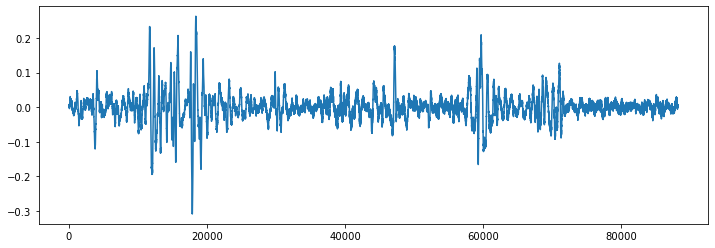

In [13]:
# Lets plot the librosa audio data
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [14]:
print("Shape of audio data:", librosa_audio_data.shape)


Shape of audio data: (88200,)


Here Librosa converts the signal to mono, meaning the channel will alays be 1



In [15]:
# 2. Load the audio file with wavefile
wave_sample_rate, wave_audio = wav.read(sample_file_path) 


In [16]:
wave_audio


array([[1182, -817],
       [1178, -794],
       [1165, -773],
       ...,
       [-475,  774],
       [-406,  789],
       [-342,  799]], dtype=int16)

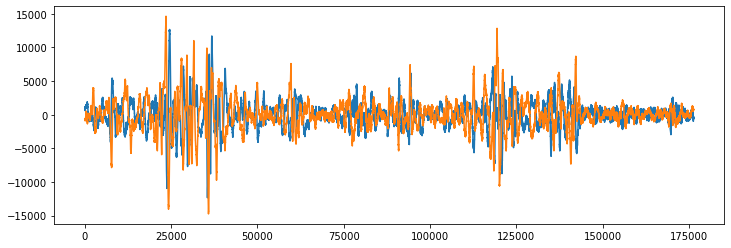

In [17]:
# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [18]:
print("Shape of audio data:", wave_audio.shape)


Shape of audio data: (176400, 2)


Difference between wavefile and librosa

scipy.io.wavfile is a subpackage of the scipy library that provides functions for reading and writing WAV files, which are a common format for storing audio data. The primary functionality of this library is to load the audio data from WAV files as NumPy arrays, which can then be processed or analyzed using various signal processing techniques. It also provides functions to write NumPy arrays as WAV files. However, scipy.io.wavfile does not include any audio analysis or feature extraction functionalities beyond reading and writing audio data.

librosa, on the other hand, is a dedicated audio processing library that provides a wide range of audio analysis and feature extraction functions, including tools for reading and writing various audio file formats. librosa includes functions for audio signal preprocessing, such as resampling, filtering, and normalization, as well as feature extraction techniques such as Mel-frequency cepstral coefficients (MFCCs), spectral features, chroma features, and more. librosa is designed to make audio signal processing and feature extraction more accessible to researchers and practitioners, and it is widely used in fields such as music information retrieval, speech processing, and audio analysis.


In scipy.io.wavfile, the read() function returns two values: the sample rate and the audio data as a NumPy array. If the WAV file is multi-channel (i.e., has more than one audio channel), the data array will have shape (num_samples, num_channels). In this case, each channel is stored as a separate column in the data array.

In contrast, librosa treats multi-channel audio as a single entity, and represents the data as a 2D NumPy array with shape (num_channels, num_samples). This means that the channels are stored as rows in the data array.

Here I use librosa for feature extraction and data representation, Because I can use MFCC for extract features and while represent the audio signal.librosa will normalise the audio signal.


/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  if __name__ == '__main__':


Audio signal duration: 4.0
Sample rate: 44100
Number of MFCCs: 20
MFCCs summary statistics:
               0           1           2           3           4           5    \
count   20.000000   20.000000   20.000000   20.000000   20.000000   20.000000   
mean    -8.586165   -7.462992   -7.334143   -6.746560   -5.491410   -5.072248   
std    115.386185  115.240639  115.995010  115.578232  115.886612  116.013512   
min   -482.867401 -477.343811 -481.770233 -479.242950 -480.463989 -480.712463   
25%      4.138795    3.171897    2.598816    4.934053    5.697616    6.057978   
50%      8.753704    9.105900   10.276952   11.495614   12.876366   10.711036   
75%     13.756949   13.668516   14.352281   13.972909   15.526035   19.625898   
max    134.165344  145.693085  142.065674  143.459229  141.435394  140.675980   

              6           7           8           9    ...         335  \
count   20.000000   20.000000   20.000000   20.000000  ...   20.000000   
mean    -4.819787   -5.420828

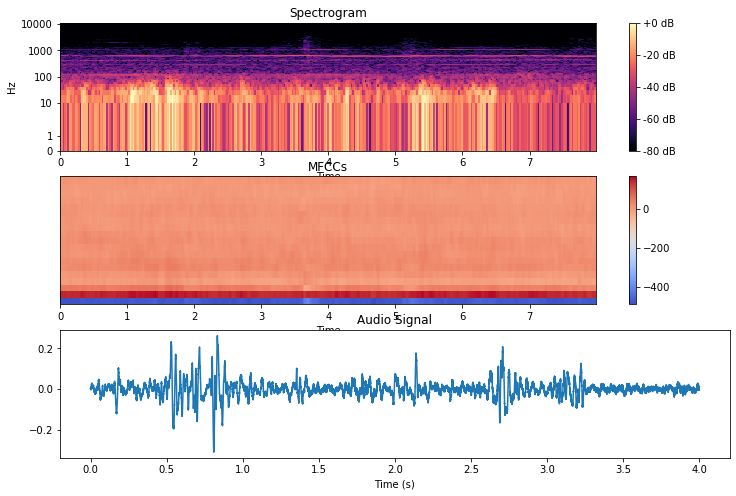

In [19]:
# Read the audio file and extract its features
audio_signal, sr = librosa.load(sample_file_path, sr=None)
spectrogram = librosa.stft(audio_signal)
mfccs = librosa.feature.mfcc(y=audio_signal, sr=sr)

# Plot the audio features
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.subplot(3, 1, 2)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.subplot(3, 1, 3)
audio_duration = len(audio_signal) / sr
audio_time = np.linspace(0, audio_duration, len(audio_signal))
plt.plot(audio_time, audio_signal)
plt.xlabel('Time (s)')
plt.title('Audio Signal')

# Analyze the audio features
print('Audio signal duration:', audio_duration)
print('Sample rate:', sr)
print('Number of MFCCs:', mfccs.shape[0])
print('MFCCs summary statistics:\n', pd.DataFrame(mfccs).describe())



The audio signal has a duration of 4.0 seconds and a sample rate of 44100 Hz. There are 20 MFCCs computed and the summary statistics are presented in a table format.The mean, standard deviation, minimum, maximum, and quartile values for each of the 20 MFCCs are provided.

The output also include spectrogram and wavefile of one sample audio file.

MFCC (Mel Frequency Cepstral Coefficients) is a widely used feature extraction technique in audio signal processing for speech and music analysis. It extracts the spectral envelope of a sound signal by calculating the log of the energy distribution of its frequencies in the mel-scale, which is a perceptual scale of pitches.

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. It shows how the signal's frequency content changes over time. It is often used for speech analysis, music analysis, and audio signal processing in general.

A wavefile is a digital audio file format used to store audio data on a computer. It is commonly used in audio processing and music production applications. The wavefile format stores uncompressed audio data in a linear pulse code modulation (LPCM) format, which means that it retains all the original audio data and does not apply any compression or lossy encoding.

In [20]:
#reading the dataset
metadata = pd.read_csv('data/data.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [21]:
#counting each class
metadata['class'].value_counts()

drilling            1000
engine_idling       1000
street_music        1000
air_conditioner     1000
jackhammer          1000
children_playing    1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

The audio samples available in each of the 10 classes for a classification problem. Each class represents a different type of sound: dog_bark, children_playing, air_conditioner, street_music, engine_idling, jackhammer, drilling, siren, car_horn, and gun_shot.

It appears that there are 1000 samples available for the first 7 classes, indicating that the data is balanced among those classes. However, there are fewer samples for the last three classes, with only 929 for siren, 429 for car_horn, and 374 for gun_shot.

In [27]:

def plot_audio_data(df, column_name):
    """
    Function to construct barplot and donutplot of a dataframe column of audio data
    Parameters:
        df (pandas.DataFrame): Input DataFrame containing the audio data
        column_name (str): Name of the column to plot 
    Returns:
        None
    """
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column_name, data=df)
    ax.set_title(f"{column_name} Distribution")
    ax.set_xlabel(column_name)
    ax.set_ylabel("Count")
    plt.show()

    # Create a donut plot
    plt.figure(figsize=(8, 6))
    ax = df[column_name].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.8)
    ax.set_title(f"{column_name} Distribution")
    ax.set_ylabel("")
    plt.show()


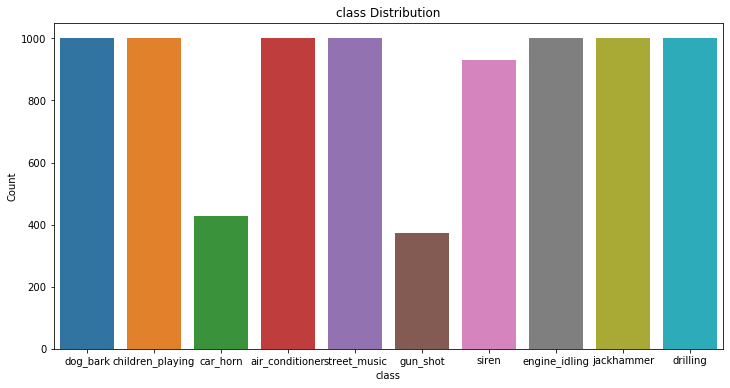

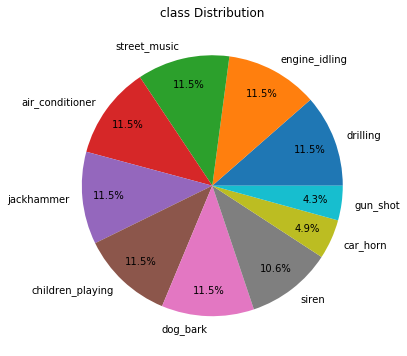

In [28]:
plot_audio_data(metadata,'class')

In [29]:
#function to extract mfcc features from an audio file using python librosa package
def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name) 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [31]:
# example mfcc feature extraction of one audio file.
sample_mfcc_features = features_extractor(sample_file_path)
sample_mfcc_features

array([-4.4015445e+02,  1.4746060e+02,  1.4453324e+01,  2.9862227e+00,
        2.9284161e+01,  2.7665627e+01,  1.8658026e+01,  2.0519293e+01,
        1.6587048e+01,  7.1054878e+00,  9.4722128e+00,  1.4271996e+01,
        9.1728191e+00,  2.1447225e+00,  1.8422624e+00,  7.0372715e+00,
        1.1471410e+01,  7.3137517e+00, -4.4037867e+00, -1.1136980e+01,
       -4.8562393e+00,  9.8854809e+00,  1.5957648e+01,  4.6011128e+00,
       -2.3065469e+00,  3.0924001e+00,  3.6037245e+00, -3.5536895e+00,
       -4.7920647e+00,  6.5487609e+00,  1.2545118e+01,  5.5598950e+00,
        3.4990248e-01,  1.1770549e+00,  2.4125869e+00,  2.8908491e+00,
        3.2356889e+00,  2.6057990e+00,  1.3602736e+00, -4.5617843e-01],
      dtype=float32)

In [32]:
#Now we ned to extract the featured from all the audio files so we use tqdm
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
audio_dataset_path = 'data/audio/'
extracted_features_1=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data_1=list(features_extractor(file_name))
    data_1.append(final_class_labels)
    extracted_features_1.append(data_1)

3555it [00:46, 74.27it/s] /home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8315it [01:47, 89.73it/s] /home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8329it [01:47, 103.95it/s]/home/msc1/anaconda3/envs/Env-7146COMP/lib/python3.7/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  f"n_fft={n_fft} is too large for input signal of length={y.shape[-1]}"
8732it [01:52, 77.62it/s] 


In [33]:
extracted_features_1[0]

[-211.93698,
 62.581215,
 -122.813156,
 -60.745293,
 -13.893755,
 -29.789835,
 -3.9788709,
 11.682741,
 12.963832,
 8.33642,
 -6.5298166,
 -2.996103,
 -12.887946,
 5.8859353,
 -2.475222,
 -4.4083095,
 -15.014475,
 -0.9439937,
 -2.5799086,
 6.0983005,
 -10.786226,
 -8.0634775,
 5.844097,
 -3.1225374,
 -5.984219,
 -0.07994219,
 -3.6870835,
 4.747684,
 -6.5300894,
 -5.083877,
 0.4877331,
 7.5108895,
 -0.8853528,
 2.393818,
 -6.3923674,
 -2.1318543,
 2.2760196,
 -0.7910796,
 -1.5400631,
 1.3211534,
 'dog_bark']

In [34]:
#creating a final features dataframe
features_df = pd.DataFrame(extracted_features_1)

In [35]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-211.936981,62.581215,-122.813156,-60.745293,-13.893755,-29.789835,-3.978871,11.682741,12.963832,8.336420,...,7.510890,-0.885353,2.393818,-6.392367,-2.131854,2.276020,-0.791080,-1.540063,1.321153,dog_bark
1,-417.005188,99.336624,-42.995586,51.073326,9.853777,7.969694,11.197088,1.929117,7.030397,4.270227,...,2.277220,-1.539241,0.767108,-0.878723,0.908737,-2.681854,1.706798,-1.793606,1.761385,children_playing
2,-452.393158,112.362534,-37.578075,43.195866,8.631845,15.379366,16.882149,1.233047,6.833122,3.900116,...,-0.154538,-5.285955,-0.790016,-2.979211,-0.202844,-3.088082,3.808014,-0.090056,0.869102,children_playing
3,-406.479218,91.196602,-25.043556,42.784523,11.586844,5.054164,12.431632,-1.599949,6.656064,1.442354,...,1.279155,0.635734,1.414131,-2.831121,1.808179,-2.178432,-0.436479,-3.051344,-0.170013,children_playing
4,-439.638733,103.862228,-42.658787,50.690285,12.209422,15.873465,11.729268,1.533584,11.292241,2.548622,...,-0.774089,-0.985246,2.566369,-2.976879,1.071742,-1.825601,3.291397,-0.169671,1.392584,children_playing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-391.372101,125.362389,-40.634056,25.899754,1.730348,5.575200,16.873087,7.889440,3.488612,-4.572375,...,3.033987,3.553833,3.725876,-1.022627,2.604555,-5.585060,-5.811629,-3.813401,5.453191,car_horn
8728,-339.427155,76.409096,-35.309879,41.984035,-22.963869,-13.623510,27.856022,-9.215821,-5.666291,13.024157,...,3.299908,-0.265233,6.929851,3.841744,1.458773,-2.501515,3.609870,-3.208832,-1.789298,car_horn
8729,-297.315338,102.090256,-36.751080,26.816488,-0.249389,3.960868,11.113070,1.912290,0.677116,-1.804645,...,0.798328,3.187672,7.566283,2.161261,3.160489,-5.056086,-1.622446,1.252145,9.132166,car_horn
8730,-336.923859,115.313904,-44.847092,24.968985,-9.888027,-2.154685,22.700090,0.234236,-0.122908,10.174067,...,2.762248,5.435959,6.602448,0.774977,3.786686,-5.386269,-6.769113,-2.858386,6.953491,car_horn


In [36]:
#Renaming column 40 as class...as this is the target column
features_df.rename(columns = {40:'class'}, inplace = True)

In [37]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,-211.936981,62.581215,-122.813156,-60.745293,-13.893755,-29.789835,-3.978871,11.682741,12.963832,8.336420,...,7.510890,-0.885353,2.393818,-6.392367,-2.131854,2.276020,-0.791080,-1.540063,1.321153,dog_bark
1,-417.005188,99.336624,-42.995586,51.073326,9.853777,7.969694,11.197088,1.929117,7.030397,4.270227,...,2.277220,-1.539241,0.767108,-0.878723,0.908737,-2.681854,1.706798,-1.793606,1.761385,children_playing
2,-452.393158,112.362534,-37.578075,43.195866,8.631845,15.379366,16.882149,1.233047,6.833122,3.900116,...,-0.154538,-5.285955,-0.790016,-2.979211,-0.202844,-3.088082,3.808014,-0.090056,0.869102,children_playing
3,-406.479218,91.196602,-25.043556,42.784523,11.586844,5.054164,12.431632,-1.599949,6.656064,1.442354,...,1.279155,0.635734,1.414131,-2.831121,1.808179,-2.178432,-0.436479,-3.051344,-0.170013,children_playing
4,-439.638733,103.862228,-42.658787,50.690285,12.209422,15.873465,11.729268,1.533584,11.292241,2.548622,...,-0.774089,-0.985246,2.566369,-2.976879,1.071742,-1.825601,3.291397,-0.169671,1.392584,children_playing


In [40]:
#Saving the extracted features dataframe to the output folder
features_df.to_csv('output/extracted_features.csv', index=False)

### Feature selection

Feature selection is an important step in audio classification as it can help to improve the accuracy and efficiency of the classification model. Audio signals are often complex and high-dimensional, which can make it challenging to train accurate classification models. Feature selection techniques aim to identify the most relevant and informative features that are useful for discriminating between different audio classes and reducing the dimensionality of the input data.

Some benefits of feature selection in audio classification include:

* Improved classification accuracy: Feature selection can help to identify the most discriminative features that are most relevant for differentiating between different audio classes. This can lead to more accurate classification models.

* Reduced overfitting: Feature selection can help to reduce the risk of overfitting by removing irrelevant or redundant features that may cause the model to memorize noise in the training data rather than learning the underlying patterns.

* Faster training and inference: Feature selection can reduce the dimensionality of the input data, which can speed up the training and inference of the classification model.

* Improved interpretability: Feature selection can help to identify the most important features that are relevant for the classification task, which can provide insights into the underlying characteristics of the audio data and the classification model.

Overall, feature selection is an important step in audio classification as it can help to improve the accuracy, efficiency, and interpretability of the classification model.


Here I use the ExtraTreeClassifier for feature selection.

ExtraTreesClassifier is an ensemble learning method based on decision trees, and it can be a useful algorithm for feature selection and classification tasks in the context of audio classification using MFCCs.
ExtraTreesClassifier builds multiple decision trees on random subsets of the input features and samples of the training data, which allows it to reduce overfitting and improve generalization performance. It can also estimate the importance of each input feature by measuring how much each feature contributes to reducing impurity in the decision trees.In the context of audio classification using MFCCs, ExtraTreesClassifier will help to Select the most informative MFCC features, Reduce overfitting and Improve classification accuracy.



In [44]:
# Load the dataset into a pandas dataframe
df = pd.read_csv("output/extracted_features.csv")

# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create an ExtraTreesClassifier model
model = ExtraTreesClassifier(n_estimators=100)

# Fit the model on the data
model.fit(X, y)

# Get the feature importance scores
importances = model.feature_importances_

# Create a dataframe to store the feature ranking
feature_ranking = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': importances})

# Sort the features by their importance scores in descending order
feature_ranking = feature_ranking.sort_values('Importance', ascending=False)

# Print the feature ranking
print(feature_ranking)


    Feature  Importance
1         1    0.054626
0         0    0.054126
3         3    0.046803
2         2    0.035985
6         6    0.035546
5         5    0.032879
7         7    0.032709
8         8    0.029318
4         4    0.029022
12       12    0.025261
10       10    0.024914
9         9    0.023735
13       13    0.023260
16       16    0.023205
19       19    0.022937
11       11    0.022566
37       37    0.022396
14       14    0.022130
17       17    0.022043
28       28    0.021820
15       15    0.021686
25       25    0.021595
30       30    0.021546
34       34    0.020732
32       32    0.020726
36       36    0.020658
26       26    0.019978
18       18    0.019815
35       35    0.019737
21       21    0.019684
38       38    0.019604
24       24    0.019576
39       39    0.019491
22       22    0.019483
27       27    0.019191
23       23    0.019144
20       20    0.018442
29       29    0.018122
33       33    0.017804
31       31    0.017704


The outputgivesthe feature importances calculated by the ExtraTreesClassifier for mfcc dataset with 40 features (indexed from 0 to 39) used for audio classification. The values in the second column represent the indices of the features, and the values in the third column represent the corresponding feature importances.

Here are some observations from the output:

Feature Importance: The feature importances range from approximately 0.0177 to 0.0546, with higher values indicating higher importance.

Ranking of Features: The features are ranked based on their importance, with Feature 1 (index 1) having the highest importance (0.0546), followed by Feature 0 (index 0) with slightly lower importance (0.0541). The importance decreases gradually as the feature index increases.

Importance of Multiple Features: The ExtraTreesClassifier has assigned non-zero importance values to multiple features, suggesting that these features collectively contribute to the classification task.

Lower Importance for Some Features: Some features have relatively lower importances (e.g., below 0.02), indicating that they may have less discriminative power in the audio classification task.

Non-Monotonic Feature Importance: The feature importances do not necessarily decrease monotonically with increasing feature index, indicating that the importance of a feature is not solely dependent on its position in the feature vector.

Based on the output, I prioritize the features with higher importances (e.g., above 0.02) for model training and evaluation, while considering the lower importance features cautiously or potentially discarding them to reduce model complexity and improve classification performance.

In [47]:
# Remove the low importance features
sfm = SelectFromModel(model, threshold=0.02)  # set threshold as desired
X_selected = sfm.fit_transform(X, y)

# Print the selected features
print(f"Selected Features: {sfm.get_support(indices=True)}")

Selected Features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 25 26 28 30 32
 34 36 37 39]
